In [37]:
import pandas as pd
import numpy as np
import os
from keras.models import Sequential
from keras.layers import Dense,Conv1D, MaxPooling1D, Flatten, Dropout
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, precision_score, recall_score,f1_score) 
import matplotlib.pyplot as plt


#Parsing to correct data types
df = pd.read_csv(f"{os.pardir}/results.csv")
df['buy'] = df['buy'].astype(int)

#Selecting features
X = np.array(df.drop(['Unnamed: 0', 'player_number', 'last_position', 'dice','current_position', 'jail', 'is_special_position'], axis=1))
Y = df['buy'].astype(int).values


In [38]:
smote = RandomOverSampler(random_state=2)
X, Y = smote.fit_resample(X, np.array(Y))

In [ ]:
model = Sequential()
model.add(Dense(6, activation='tanh', input_shape=(X.shape[1],))) # Change input shape to match number of features
model.add(Dense(5, activation='relu'))
model.add(Dense(3, activation='linear'))
model.add(Dense(1, activation='sigmoid')) #Output layer should be sigmoid for binary problems (0,1)

# Optimizer setup
model.compile(loss='binary_crossentropy',#Cost function
              optimizer='sgd',
              metrics=['accuracy'])

# Net training
model_history=model.fit(X, Y,epochs=200, batch_size=100, verbose=1)

In [47]:
X = X.reshape(X.shape[0], X.shape[1], 1)

# Define the CNN model
model = Sequential([
    Conv1D(filters=16, kernel_size=3, activation='relu', input_shape=(X.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=32, kernel_size=3, activation='relu'),
    Dropout(0.5), #If I take this, the model overfits ????
    Flatten(),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
model_history = model.fit(X, Y, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
3233/3233 [==============================] - 2s 657us/step - loss: 1.4685 - accuracy: 0.4992 - val_loss: 0.6932 - val_accuracy: 0.4946
Epoch 2/100
3233/3233 [==============================] - 2s 640us/step - loss: 0.6942 - accuracy: 0.4998 - val_loss: 0.6932 - val_accuracy: 0.4946
Epoch 3/100
3233/3233 [==============================] - 2s 656us/step - loss: 0.6942 - accuracy: 0.4989 - val_loss: 0.6932 - val_accuracy: 0.4946
Epoch 4/100
3233/3233 [==============================] - 2s 651us/step - loss: 0.6939 - accuracy: 0.4999 - val_loss: 0.6934 - val_accuracy: 0.4946
Epoch 5/100
3233/3233 [==============================] - 2s 651us/step - loss: 0.6934 - accuracy: 0.4997 - val_loss: 0.6934 - val_accuracy: 0.4946
Epoch 6/100
3233/3233 [==============================] - 2s 659us/step - loss: 0.6932 - accuracy: 0.4982 - val_loss: 0.6933 - val_accuracy: 0.4946
Epoch 7/100
3233/3233 [==============================] - 2s 645us/step - loss: 0.6933 - accuracy: 0.4994 - val_loss: 0

KeyboardInterrupt: 

(Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'Accuracy function'))

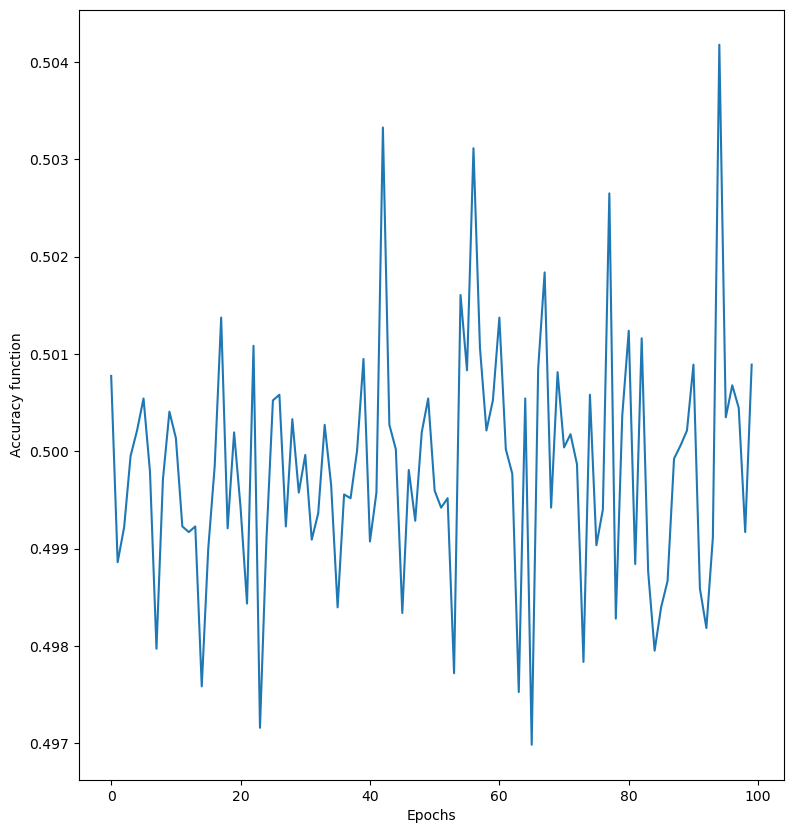

In [42]:
fig = plt.figure(figsize=(20,10))
plt.subplot(122)
plt.plot(model_history.history['accuracy'])
plt.xlabel('Epochs'),plt.ylabel('Accuracy function')

In [30]:

#Predictions
Y_pred = model.predict(X) #Probability terms
Y_prob = (model.predict(X) > 0.5).astype("int32") #Class terms

4039/4039 [==============================] - 2s 444us/step


In [32]:

#Train metrics
accu_train = accuracy_score(Y,(model.predict(X) > 0.5).astype("int32"))
prec_train = precision_score(Y,(model.predict(X) > 0.5).astype("int32"))
reca_train = recall_score(Y,(model.predict(X) > 0.5).astype("int32"))



print(' \t Accu \t Prec \t Reca\n Test \t %0.3f \t %0.3f \t %0.3f'%(accu_train,prec_train,reca_train))


4039/4039 [==============================] - 2s 413us/step
 	 Accu 	 Prec 	 Reca
 Test 	 1.000 	 1.000 	 1.000
